In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
# LOAD DATASET
df = pd.read_csv('russia_losses_equipment.csv')
df

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2022-05-22,88,204,170,1285,3141,599,201,NaN,NaN,470,13,93,43.0,NaN,2194.0,107.0
87,2022-05-23,89,204,170,1293,3166,604,201,NaN,NaN,476,13,93,43.0,NaN,2206.0,110.0
88,2022-05-24,90,205,170,1302,3194,606,201,NaN,NaN,480,13,93,43.0,NaN,2213.0,112.0
89,2022-05-25,91,206,170,1305,3213,606,201,NaN,NaN,491,13,93,44.0,NaN,2217.0,112.0


In [3]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,65.000000,65.000000,91.000000,91.000000,91.000000,72.000000,36.000000,26.000000,26.000000
mean,47.00000,139.483516,126.945055,747.450549,1983.131868,345.967033,118.131868,1047.507692,69.323077,170.351648,7.252747,58.395604,29.444444,3.944444,2042.730769,97.000000
std,26.41338,59.639167,41.893612,351.079487,723.008179,164.651649,55.197868,466.162060,7.545917,161.032321,3.710626,25.683492,10.110501,0.333333,133.944035,8.935323
min,2.00000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,24.50000,95.500000,116.500000,471.000000,1478.500000,221.500000,73.000000,600.000000,60.000000,19.000000,3.000000,44.000000,24.000000,4.000000,1940.750000,90.500000
50%,47.00000,154.000000,137.000000,725.000000,1923.000000,347.000000,111.000000,1178.000000,73.000000,119.000000,7.000000,55.000000,27.000000,4.000000,2050.500000,95.000000
75%,69.50000,194.000000,155.000000,1069.500000,2588.500000,483.000000,162.500000,1437.000000,76.000000,297.000000,10.000000,80.500000,39.500000,4.000000,2160.750000,103.000000
max,92.00000,206.000000,170.000000,1315.000000,3235.000000,617.000000,201.000000,1701.000000,76.000000,502.000000,13.000000,93.000000,47.000000,4.000000,2225.000000,114.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     91 non-null     object 
 1   day                      91 non-null     int64  
 2   aircraft                 91 non-null     int64  
 3   helicopter               91 non-null     int64  
 4   tank                     91 non-null     int64  
 5   APC                      91 non-null     int64  
 6   field artillery          91 non-null     int64  
 7   MRL                      91 non-null     int64  
 8   military auto            65 non-null     float64
 9   fuel tank                65 non-null     float64
 10  drone                    91 non-null     int64  
 11  naval ship               91 non-null     int64  
 12  anti-aircraft warfare    91 non-null     int64  
 13  special equipment        72 non-null     float64
 14  mobile SRBM system       36 

## Changes NaN Values in 'mobile SRBM system' column with The Mode

In [5]:
df.loc[df['mobile SRBM system'].notnull(), 'mobile SRBM system']

29    2.0
30    4.0
31    4.0
32    4.0
33    4.0
34    4.0
35    4.0
36    4.0
37    4.0
38    4.0
39    4.0
40    4.0
41    4.0
42    4.0
43    4.0
44    4.0
45    4.0
46    4.0
47    4.0
48    4.0
49    4.0
50    4.0
51    4.0
52    4.0
53    4.0
54    4.0
55    4.0
56    4.0
57    4.0
58    4.0
59    4.0
60    4.0
61    4.0
62    4.0
63    4.0
64    4.0
Name: mobile SRBM system, dtype: float64

In [6]:
df.loc[df['mobile SRBM system'] == 4, 'mobile SRBM system'].count()

35

In [7]:
df.loc[df['mobile SRBM system'] == 2, 'mobile SRBM system'].count()

1

In [8]:
mobile_mode = stat.mode(df["mobile SRBM system"])
mobile_mode

4.0

In [9]:
df["mobile SRBM system"] = df["mobile SRBM system"].fillna(mobile_mode)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,4.0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,4.0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,4.0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,4.0,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,4.0,NaN,NaN


## Changes NaN Values in 'vehicles and fuel tanks' column with The Median Value

In [10]:
df.loc[df['vehicles and fuel tanks'].notnull(), 'vehicles and fuel tanks']

65    1796.0
66    1824.0
67    1843.0
68    1867.0
69    1907.0
70    1926.0
71    1934.0
72    1961.0
73    1970.0
74    1980.0
75    1997.0
76    2019.0
77    2042.0
78    2059.0
79    2087.0
80    2101.0
81    2109.0
82    2137.0
83    2157.0
84    2162.0
85    2178.0
86    2194.0
87    2206.0
88    2213.0
89    2217.0
90    2225.0
Name: vehicles and fuel tanks, dtype: float64

In [11]:
vehicle_med = df['vehicles and fuel tanks'].median()
vehicle_med 

2050.5

In [12]:
df['vehicles and fuel tanks'] = df['vehicles and fuel tanks'].fillna(vehicle_med)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,4.0,2050.5,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,4.0,2050.5,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,4.0,2050.5,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,4.0,2050.5,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,4.0,2050.5,NaN


## Changes NaN Values in 'cruise missiles' column with The Mean Value

In [13]:
df.loc[df['cruise missiles'].notnull(), 'cruise missiles']

65     84.0
66     84.0
67     84.0
68     87.0
69     89.0
70     90.0
71     90.0
72     92.0
73     94.0
74     94.0
75     94.0
76     94.0
77     95.0
78     95.0
79     95.0
80     97.0
81     97.0
82    102.0
83    103.0
84    103.0
85    104.0
86    107.0
87    110.0
88    112.0
89    112.0
90    114.0
Name: cruise missiles, dtype: float64

In [14]:
cruise_mean = df['cruise missiles'].mean()
cruise_mean

97.0

In [15]:
df['cruise missiles'] = df['cruise missiles'].fillna(cruise_mean)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,4.0,2050.5,97.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,4.0,2050.5,97.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,4.0,2050.5,97.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,4.0,2050.5,97.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,4.0,2050.5,97.0


## Changes NaN Values in 'special equipment' column with The Mean Value

In [16]:
df.loc[df['special equipment'].notnull(), 'special equipment']

19    10.0
20    10.0
21    11.0
22    11.0
23    12.0
      ... 
86    43.0
87    43.0
88    43.0
89    44.0
90    47.0
Name: special equipment, Length: 72, dtype: float64

In [17]:
special_mean = df['special equipment'].mean()
special_mean

29.444444444444443

In [18]:
df['special equipment'] = df['special equipment'].fillna(special_mean)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,29.444444,4.0,2050.5,97.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,29.444444,4.0,2050.5,97.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,29.444444,4.0,2050.5,97.0


## Changes NaN Values in 'Fuel Tank' column with The Mean Value

In [19]:
df.loc[df['fuel tank'].notnull(), 'fuel tank']

0     60.0
1     60.0
2     60.0
3     60.0
4     60.0
      ... 
60    76.0
61    76.0
62    76.0
63    76.0
64    76.0
Name: fuel tank, Length: 65, dtype: float64

In [20]:
fuel_mean = df['fuel tank'].mean()
fuel_mean

69.32307692307693

In [21]:
df['fuel tank'] = df['fuel tank'].fillna(fuel_mean)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,29.444444,4.0,2050.5,97.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,29.444444,4.0,2050.5,97.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,29.444444,4.0,2050.5,97.0


In [22]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,65.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,47.00000,139.483516,126.945055,747.450549,1983.131868,345.967033,118.131868,1047.507692,69.323077,170.351648,7.252747,58.395604,29.444444,3.978022,2048.280220,97.000000
std,26.41338,59.639167,41.893612,351.079487,723.008179,164.651649,55.197868,466.162060,6.363276,161.032321,3.710626,25.683492,8.980088,0.209657,70.682868,4.709329
min,2.00000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,24.50000,95.500000,116.500000,471.000000,1478.500000,221.500000,73.000000,600.000000,60.000000,19.000000,3.000000,44.000000,25.000000,4.000000,2050.500000,97.000000
50%,47.00000,154.000000,137.000000,725.000000,1923.000000,347.000000,111.000000,1178.000000,69.323077,119.000000,7.000000,55.000000,29.444444,4.000000,2050.500000,97.000000
75%,69.50000,194.000000,155.000000,1069.500000,2588.500000,483.000000,162.500000,1437.000000,76.000000,297.000000,10.000000,80.500000,38.000000,4.000000,2050.500000,97.000000
max,92.00000,206.000000,170.000000,1315.000000,3235.000000,617.000000,201.000000,1701.000000,76.000000,502.000000,13.000000,93.000000,47.000000,4.000000,2225.000000,114.000000


## Changes NaN Values in 'military auto' column with The Median Value

In [23]:
df.loc[df['military auto'].notnull(), 'military auto']

0      100.0
1      130.0
2      130.0
3      291.0
4      305.0
       ...  
60    1643.0
61    1666.0
62    1688.0
63    1695.0
64    1701.0
Name: military auto, Length: 65, dtype: float64

In [24]:
military_med = df['military auto'].median()
military_med

1178.0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     91 non-null     object 
 1   day                      91 non-null     int64  
 2   aircraft                 91 non-null     int64  
 3   helicopter               91 non-null     int64  
 4   tank                     91 non-null     int64  
 5   APC                      91 non-null     int64  
 6   field artillery          91 non-null     int64  
 7   MRL                      91 non-null     int64  
 8   military auto            65 non-null     float64
 9   fuel tank                91 non-null     float64
 10  drone                    91 non-null     int64  
 11  naval ship               91 non-null     int64  
 12  anti-aircraft warfare    91 non-null     int64  
 13  special equipment        91 non-null     float64
 14  mobile SRBM system       91 

In [26]:
df['military auto'] = df['military auto'].fillna(military_med)
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,29.444444,4.0,2050.5,97.0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,29.444444,4.0,2050.5,97.0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,29.444444,4.0,2050.5,97.0


In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['weekday'] = pd.DatetimeIndex(df.date).weekday
df['date day'] = pd.DatetimeIndex(df.date).day
df['month'] = pd.DatetimeIndex(df.date).month

In [29]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,weekday,date day,month
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,29.444444,4.0,2050.5,97.0,4,25,2
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0,5,26,2
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,29.444444,4.0,2050.5,97.0,6,27,2
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,29.444444,4.0,2050.5,97.0,0,28,2
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,29.444444,4.0,2050.5,97.0,1,1,3


Text(0, 0.5, 'Number of Aircraft')

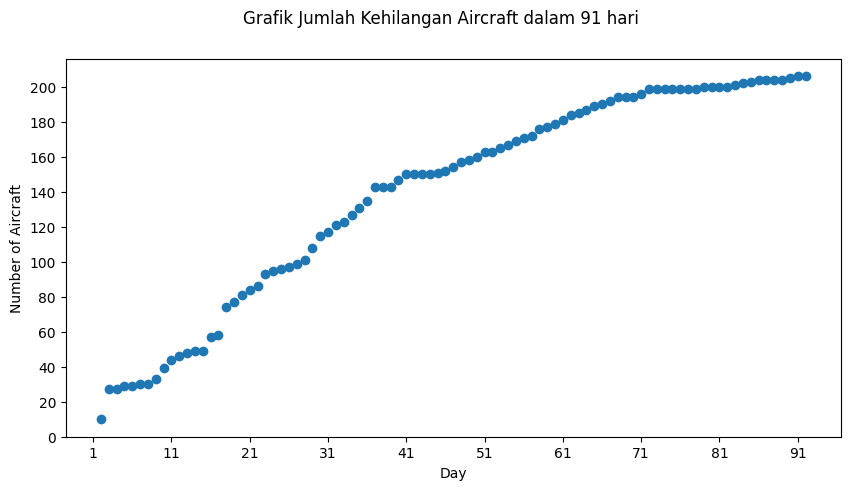

In [30]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['aircraft'])
plt.xticks(np.arange(1,92, step=10))
plt.yticks(np.arange(0,211, step=20))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan Aircraft dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Aircraft')

Text(0, 0.5, 'Jumlah Kehilangan')

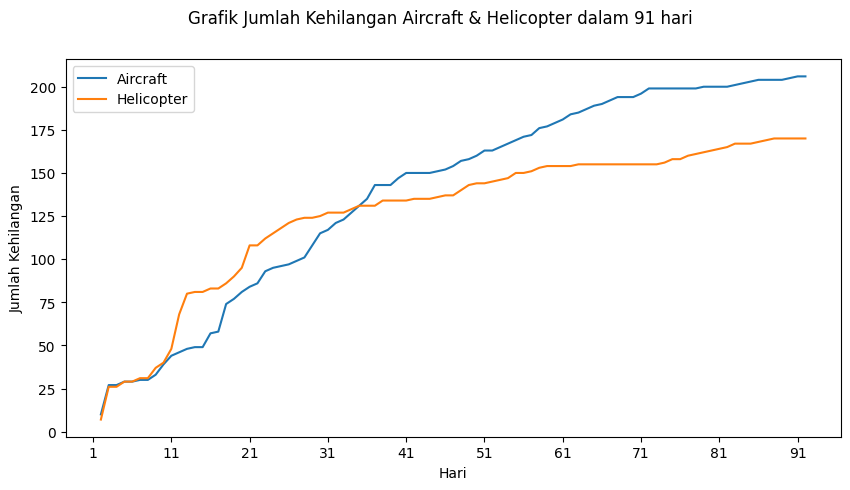

In [31]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.plot(df['day'], df['aircraft'], label = 'Aircraft')
plt.plot(df['day'], df['helicopter'], label = 'Helicopter')
plt.xticks(np.arange(1,92, step=10))
plt.legend()
fig.suptitle('Grafik Jumlah Kehilangan Aircraft & Helicopter dalam 91 hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kehilangan')

In [32]:
fig = plt.figure(figsize = (12,5), dpi=100)
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Number of Losses')

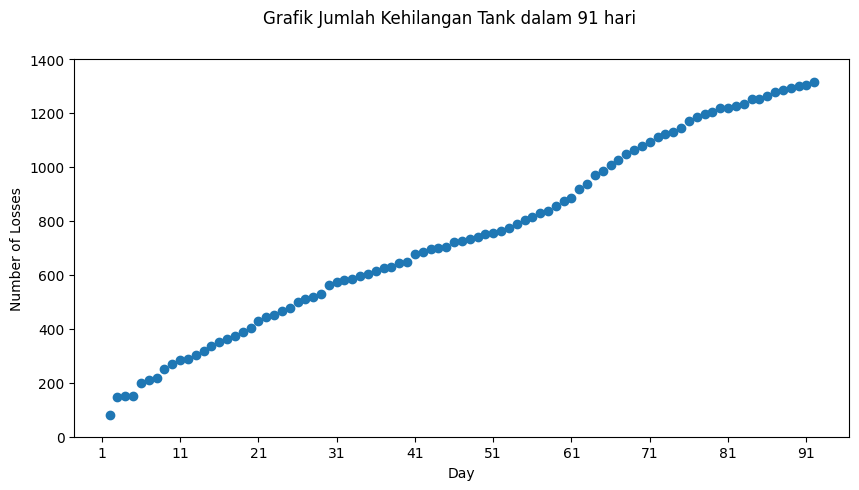

In [33]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['tank'])
plt.xticks(np.arange(1,92, step=10))
plt.yticks(np.arange(0,1410, step=200))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan Tank dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

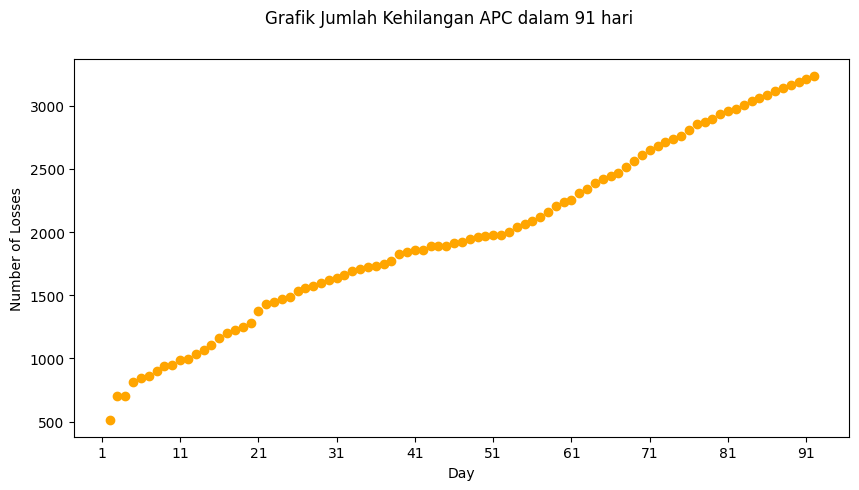

In [34]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['APC'], c = 'orange')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan APC dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

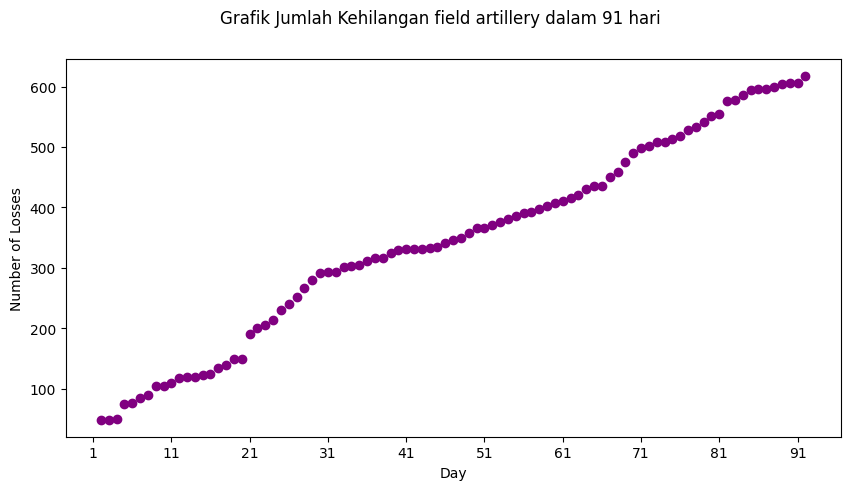

In [35]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['field artillery'], c = 'purple')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan field artillery dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

In [36]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles',
       'weekday', 'date day', 'month'],
      dtype='object')

Text(0, 0.5, 'Number of Losses')

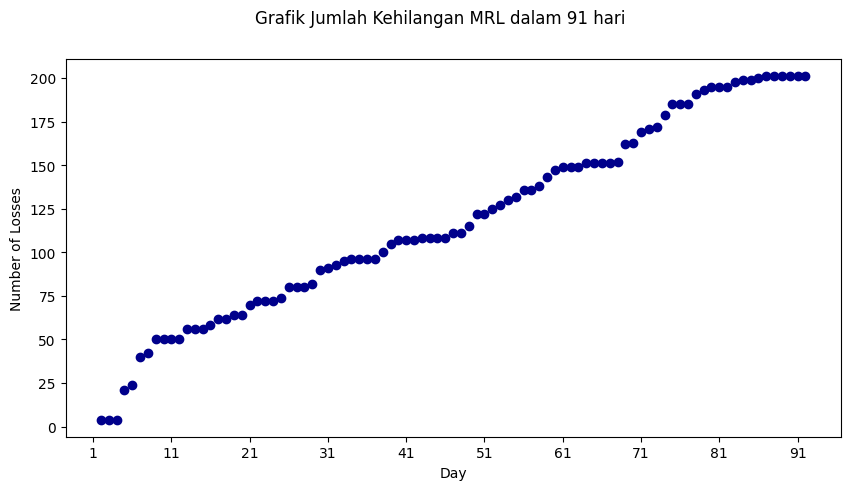

In [37]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['MRL'], c = 'darkblue')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan MRL dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

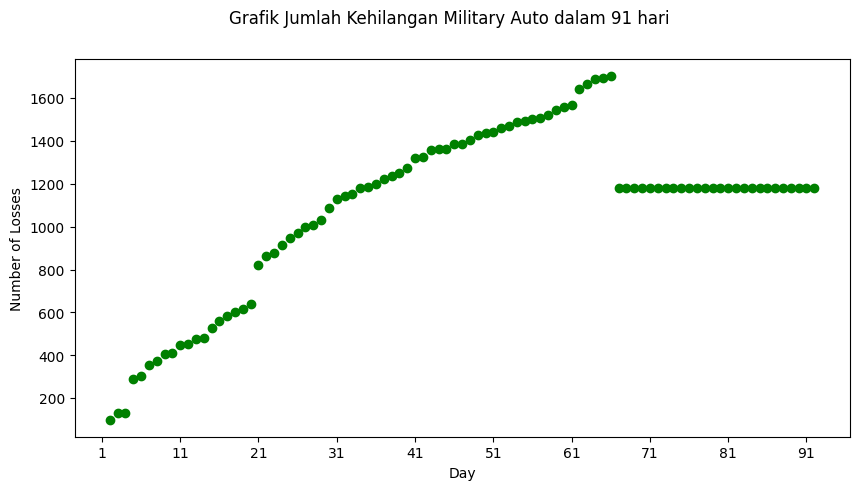

In [38]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['military auto'], c = 'green')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan Military Auto dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

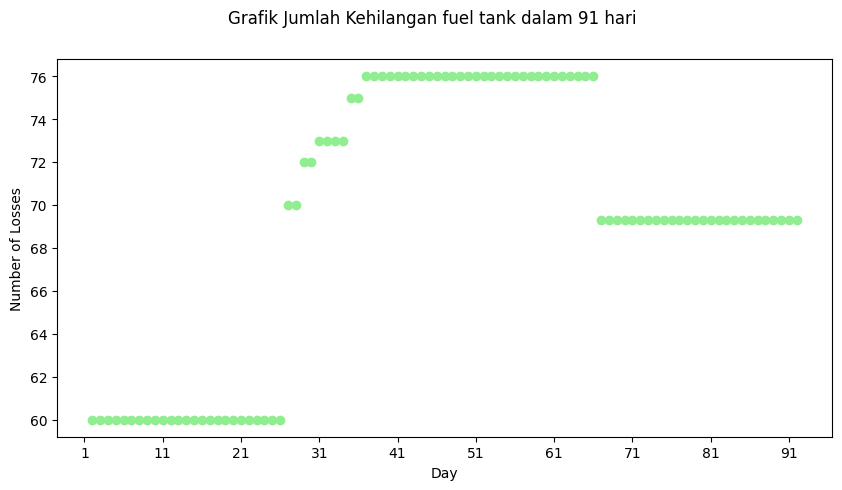

In [39]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['fuel tank'], c = 'lightgreen')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan fuel tank dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

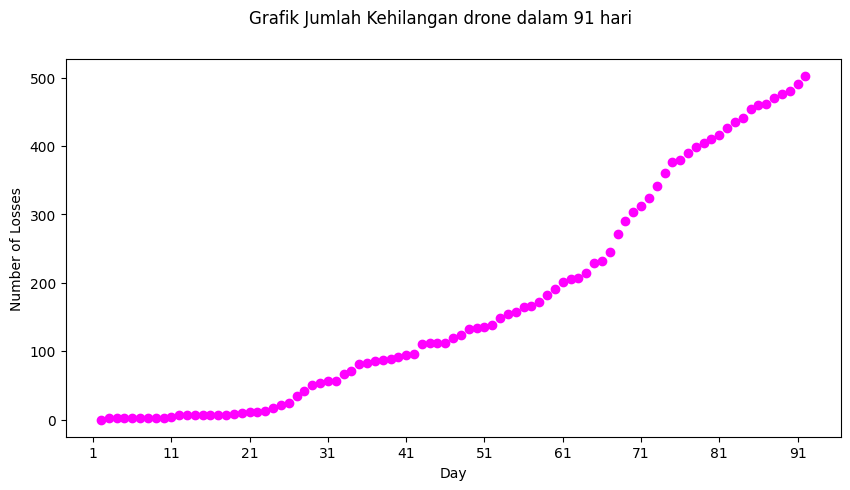

In [40]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['drone'], c = 'magenta')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan drone dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

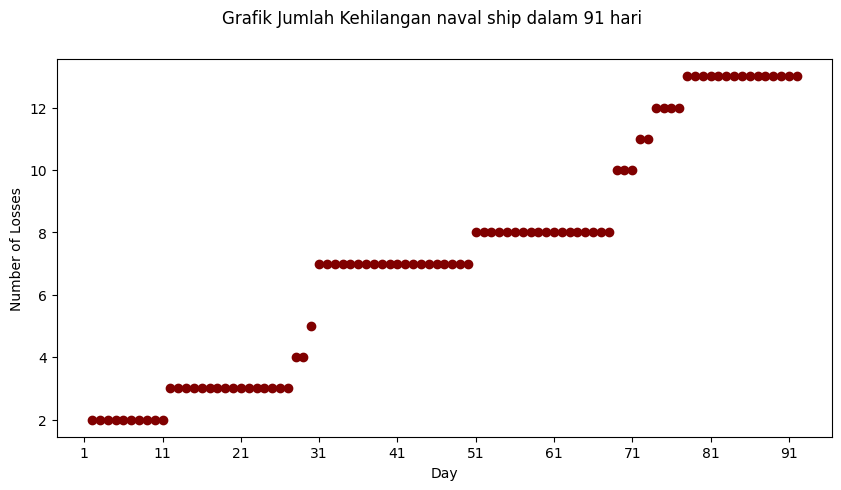

In [41]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['naval ship'], c = 'maroon')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan naval ship dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

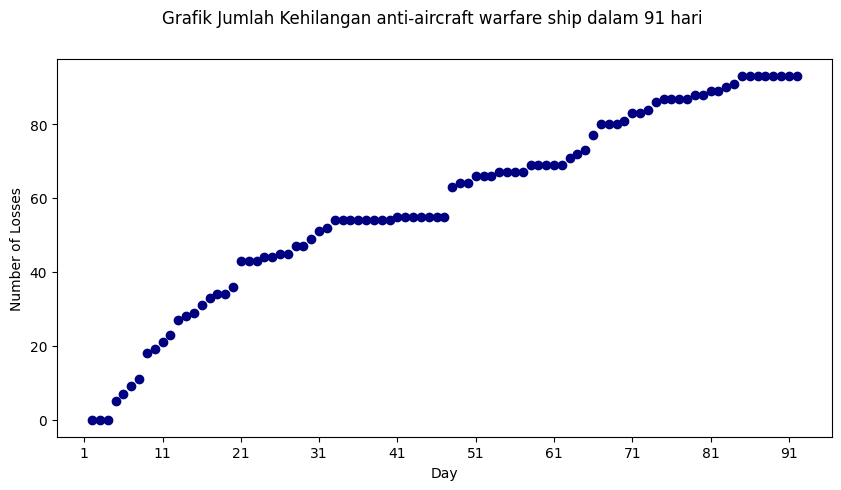

In [42]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['anti-aircraft warfare'], c = 'navy')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan anti-aircraft warfare ship dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

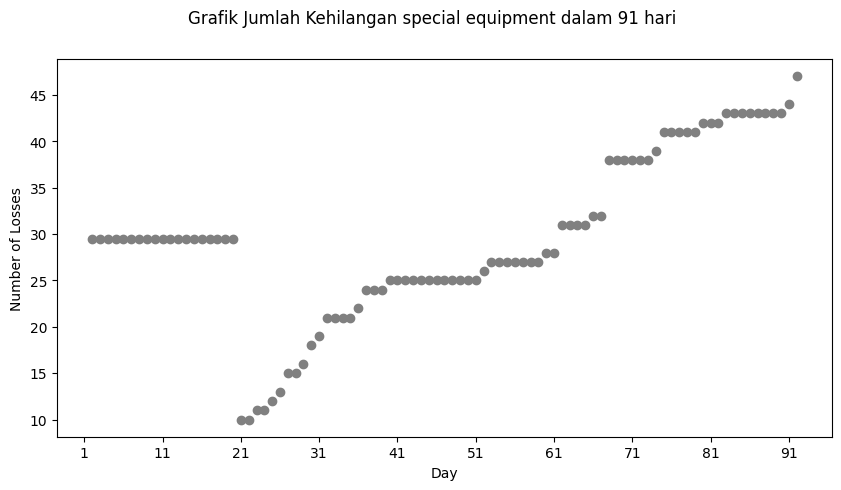

In [43]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['special equipment'], c = 'gray')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan special equipment dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

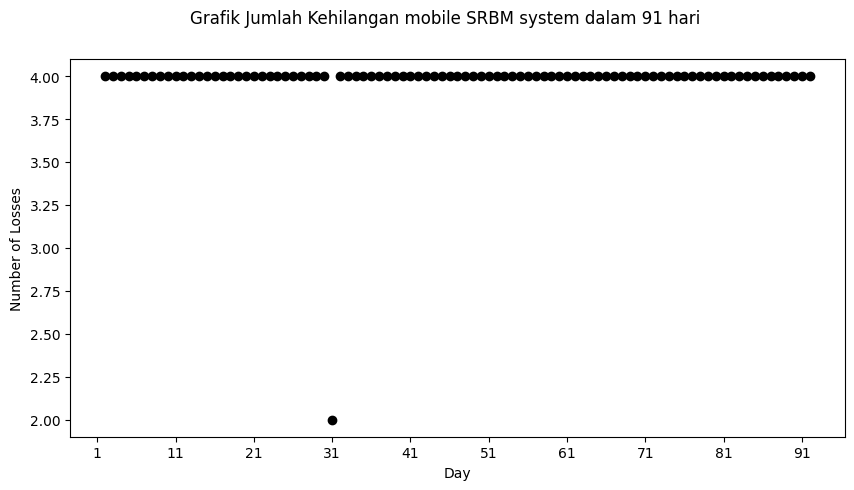

In [44]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['mobile SRBM system'], c = 'black')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan mobile SRBM system dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

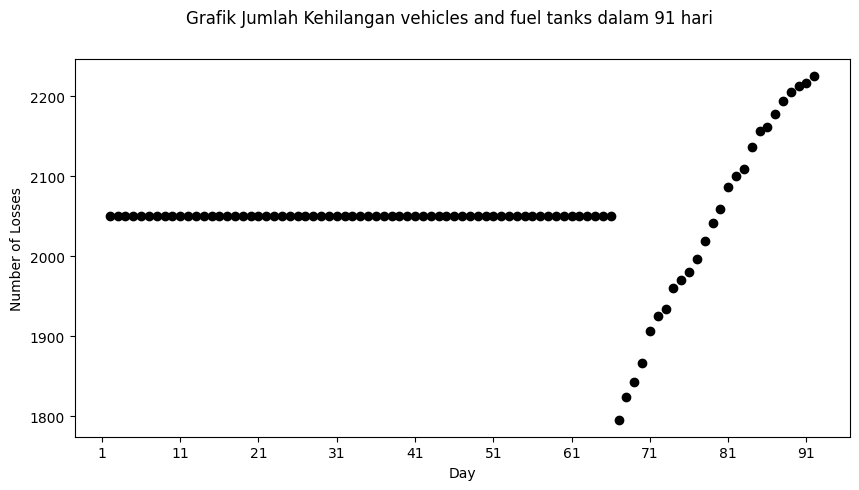

In [45]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['vehicles and fuel tanks'], c = 'black')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan vehicles and fuel tanks dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

Text(0, 0.5, 'Number of Losses')

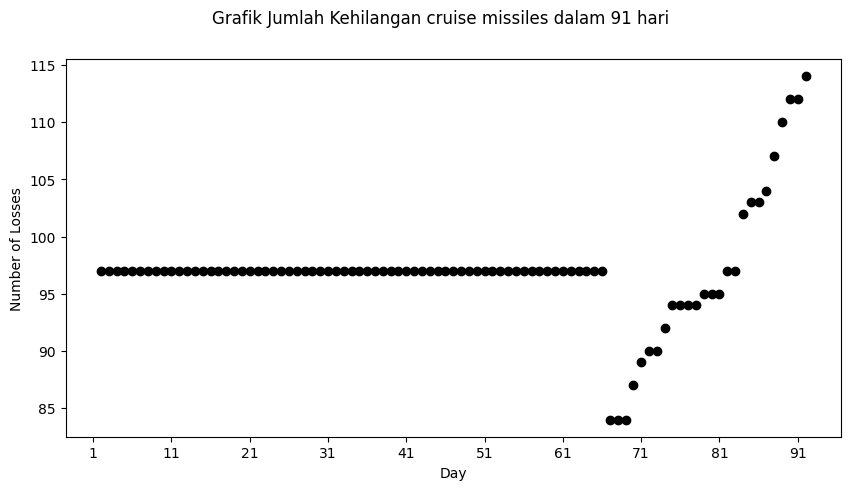

In [46]:
fig = plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x = df['day'], y = df['cruise missiles'], c = 'black')
plt.xticks(np.arange(1,92, step=10))
for txt in fig.texts:
    txt.set_visible(False)
fig.suptitle('Grafik Jumlah Kehilangan cruise missiles dalam 91 hari')
plt.xlabel('Day')
plt.ylabel('Number of Losses')

In [50]:
# Drop Date Column
df.drop('date', axis = 1, inplace = True)

In [51]:
from sklearn import preprocessing
column_names = df.columns.to_list()
normal = preprocessing.normalize(df)
normalized_df = pd.DataFrame(normal, columns = column_names)
normalized_df.head()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,weekday,date day,month
0,0.000942,0.004712,0.003298,0.037694,0.243128,0.023088,0.001885,0.047118,0.028271,0.000000,0.000942,0.000000,0.013874,0.001885,0.966152,0.045704,0.001885,0.011779,0.000942
1,0.001375,0.012376,0.011918,0.066922,0.323607,0.022460,0.001833,0.059588,0.027502,0.000917,0.000917,0.000000,0.013496,0.001833,0.939881,0.044462,0.002292,0.011918,0.000917
2,0.001833,0.012374,0.011916,0.068745,0.323561,0.022915,0.001833,0.059579,0.027498,0.000917,0.000917,0.000000,0.013494,0.001833,0.939747,0.044455,0.002750,0.012374,0.000917
3,0.002236,0.012969,0.012969,0.067083,0.364929,0.033094,0.009392,0.130140,0.026833,0.001342,0.000894,0.002236,0.013168,0.001789,0.917018,0.043380,0.000000,0.012522,0.000894
4,0.002663,0.012873,0.012873,0.087894,0.375548,0.034181,0.010654,0.135393,0.026635,0.001332,0.000888,0.003107,0.013071,0.001776,0.910239,0.043059,0.000444,0.000444,0.001332


In [52]:
normalized_df.to_csv('normalize_losses_equipment', index=False)